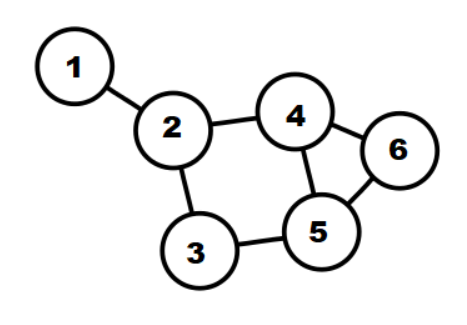

**Vertex**: Every individual data element is called a vertex or a node. In the above image 1,2,3,4,5  & 6 are the vertices.  

**Edge**: It is a connecting link between two nodes or vertices. Each edge has two ends and is represented as (startingVertex,   
endingVertex).  

**Undirected Edge**: It is a bidirectional edge.  

**Directed Edge**: It is a unidirectional edge.  
m
**Weighted Edge**: An edge with value (cost) on it.  

**Degree**: The total number of edges connected to a vertex in a graph.  

**Indegree**: The total number of incoming edges connected to a vertex.  

**Outdegree**: The total number of outgoing edges connected to a vertex.  

**Self-loop**: An edge is called a self-loop if its two endpoints coincide with each other.  

**Adjacency**: Vertices are said to be adjacent to one another if there is an edge connecting them.  

**

In [ ]:
struct TreeNode {
    int Data;
    TreeNode *left;
    TreeNode *right;
};

Graph Representation:
1. Adjacency list
2. Matrix representationm


### Represensation of Unweighted Undirected Graph
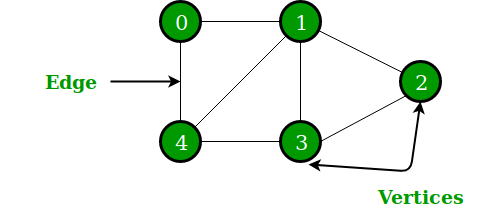

```
v: vertices
e: edges

0: [1,4]
1: [0,4,3,2]
4: [0,1,3]
3: [4,1,2]
2: [1,3]

SC: (v+2e)



   0  1  2  3  4
0  0  1  0  0  1
1  1  0  1  1  1
2  0  1  0  1  0
3  0  1  1  0  1
4  1  1  0  1  0

SC: (v^2)
```

### Represensation of Unweighted Directed Graph
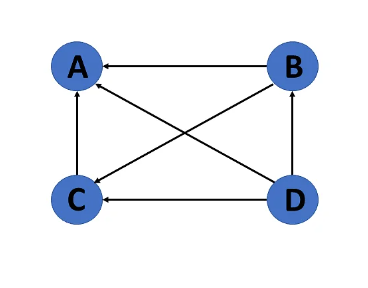


```
A: []
B: [A,C]
C: [A]
D: [A,B,C]

SC: (v+2e)

  A  B  C  D
A 0  0  0  0
B 1  0  1  0
C 1  0  0  0
D 1  1  1  0

SC: (v^2)
```

In [4]:
# Adjancey List Repr
# dict<int, List> 
# map<int, vector<int>>
class UndirectedGraph:
    
    def __init__(self):
        self.__data = {} # empty dict/map
        
    def add(self, v1, v2):
        
        if v1 not in self.__data:
            self.__data[v1] = []
        self.__data[v1].append(v2)
            
        if v2 not in self.__data:
            self.__data[v2] = []
        self.__data[v2].append(v1)
        
    def print(self):
        print(self.__data)
        
    
g = UndirectedGraph()
g.add(0,1)
g.add(0,4)
g.add(1,4)
g.add(1,3)
g.add(1,2)
g.add(4,3)
g.add(3,2)
g.print()

# 0: [1,4]
# 1: [0,4,3,2]
# 4: [0,1,3]
# 3: [4,1,2]
# 2: [1,3]

{0: [1, 4], 1: [0, 4, 3, 2], 4: [0, 1, 3], 3: [1, 4, 2], 2: [1, 3]}


In [8]:
# Adjancey List Repr
# dict<int, List> 
# map<int, vector<int>>
class DirectedGraph:
    
    def __init__(self):
        self.__data = {} # empty dict/map
        
    def add(self, v1, v2):
        """
        Create an edge from v1->v2
        """
        
        if v1 not in self.__data:
            self.__data[v1] = []
        self.__data[v1].append(v2) 
        
        if v2 not in self.__data:
            self.__data[v2] = []
            
    def print(self):
        print(self.__data)
        
    
g = DirectedGraph()
g.add('B','A')
g.add('B','C')
g.add('C','A')
g.add('D','A')
g.add('D','B')
g.add('D','C')
# A: []
# B: [A,C]
# C: [A]
# D: [A,B,C]
g.print()

{'B': ['A', 'C'], 'A': [], 'C': ['A'], 'D': ['A', 'B', 'C']}


### Matrix Repr

In [27]:
# dict<int, List> 
# map<int, vector<int>>
class UndirectedGraph:
    
    def __init__(self, num_vertices):
        self.__data = []
        for _ in range(num_vertices):
            self.__data.append( [0 for _ in range(num_vertices) ] )
        
    def add(self, v1, v2):
        self.__data[v1][v2] = 1
        self.__data[v2][v1] = 1
        
    def print(self):
        for row in self.__data:
            print(row)
        
    
g = UndirectedGraph(5)
g.add(0,1)
g.add(0,4)
g.add(1,4)
g.add(1,3)
g.add(1,2)
g.add(4,3)
g.add(3,2)
g.print()

# 0: [1,4]
# 1: [0,4,3,2]
# 4: [0,1,3]
# 3: [4,1,2]
# 2: [1,3]

[0, 1, 0, 0, 1]
[1, 0, 1, 1, 1]
[0, 1, 0, 1, 0]
[0, 1, 1, 0, 1]
[1, 1, 0, 1, 0]


In [ ]:
### Traversal
- DFS: stack, recursion
- BFS: queue, iteration

## BFS: Using queue

In [26]:
import queue
# Adjancey List Repr
# dict<int, List> 
# map<int, vector<int>>
class UndirectedGraph:
    
    def __init__(self):
        self.__data = {} # empty dict/map
        
    def add(self, v1, v2):
        
        if v1 not in self.__data:
            self.__data[v1] = []
        self.__data[v1].append(v2)
            
        if v2 not in self.__data:
            self.__data[v2] = []
        self.__data[v2].append(v1)
        
    def traverse(self):
#         // q
#         // set
#         // add first element to q and set
#         // while q is not  empty:
#         //   check if neighbour not in set:
#         //      push to set and q
        q = queue.Queue()
        visited = set() # hash set O(1)
        if len(self.__data) == 0:
            print("{}")
            return
        
        curr = next(iter(self.__data.keys())) # get one element
        q.put(curr)
        visited.add(curr)
        while not q.empty(): # O(v)
            curr = q.get()
            print(curr)
            neighbours = self.__data[curr]
            
            for v in neighbours:  # v
                if v not in visited:
                    visited.add(v)
                    q.put(v)
        
# TC: O(v^2) worst case (all vertices are connected)
# TC: O(e)
# SC: O(v)
    
g = UndirectedGraph()
g.add(0,1)
g.add(0,4)
g.add(1,4)
g.add(1,3)
g.add(1,2)
g.add(4,3)
g.add(3,2)
g.traverse()

# 0: [1,4]
# 1: [0,4,3,2]
# 4: [0,1,3]
# 3: [4,1,2]
# 2: [1,3]

0
1
4
3
2


```Java
class UndirectedGraph{
    Map<Integer,List<Integer>> graph;
    public  UndirectedGrap(){
         graph = new HashMap<>();
    }
       

    public void add(self, v1, v2){
         graph.computeIfAbsent(v1,value->new ArrayList<>()).add(v2);
         graph.computeIfAbsent(v2,value->new ArrayList<>()).add(v1);
    }
        
    public void  traverse(){
        Queue<Integer> que = new LinkedList<>();
        Set<Integer> vis = new HashSet<>();
        que.add(0);
        vis.add(0);
        while(que.size()>0){
            Integer front = que.remove();
            System.out.print(front+" ");
            for(Integer adj: graph.get(front)){
                if(!vis.contains(adj)){
                    que.add(adj);
                    set.add(adj);
                }
            }
        }
    }
}
```


```Java

public class UndirectedGraph {
    private HashMap<Integer, ArrayList<Integer>> data;

    public UndirectedGraph() {
        data = new HashMap<>();
    }

    public void add(int v1, int v2) {
        if (!data.containsKey(v1)) {
            data.put(v1, new ArrayList<>());
        }
        data.get(v1).add(v2);

        if (!data.containsKey(v2)) {
            data.put(v2, new ArrayList<>());
        }
        data.get(v2).add(v1);
    }

    public void traverse() {
        HashSet<Integer> visited = new HashSet<>();
        Queue<Integer> queue = new LinkedList<>();

        // Add the first element to the queue and visited set
        int startVertex = data.keySet().iterator().next();
        visited.add(startVertex);
        queue.offer(startVertex);

        while (!queue.isEmpty()) {
            int currentVertex = queue.poll();
            System.out.print(currentVertex + " ");

            ArrayList<Integer> neighbors = data.get(currentVertex);
            for (int neighbor : neighbors) {
                if (!visited.contains(neighbor)) {
                    visited.add(neighbor);
                    queue.offer(neighbor);
                }
            }
        }
    }
 }
```


### DFS

In [33]:
import queue
# Adjancey List Repr
# dict<int, List> 
# map<int, vector<int>>
class UndirectedGraph:
    
    def __init__(self):
        self.__data = {} # empty dict/map
        
    def add(self, v1, v2):
        
        if v1 not in self.__data:
            self.__data[v1] = []
        self.__data[v1].append(v2)
            
        if v2 not in self.__data:
            self.__data[v2] = []
        self.__data[v2].append(v1)
        
    def traverse(self):
        if len(self.__data) == 0:
            print("{}")
            return
        
        curr = next(iter(self.__data.keys())) # get one element
        visited  = set()
        self._traverse(curr, visited)
        
    def _traverse(self, curr, visited):
        if curr in visited:
            return
        
        print(curr) # process current node
        visited.add(curr)
        
        # recur for neighbours that are not already visited
        for v in self.__data[curr]:
            if v not in visited:
                self._traverse(v, visited)    

    def traverse_disconnected(self):
        if len(self.__data) == 0:
            print("{}")
            return
        
        visited  = set()
        for node in self.__data.keys(): # traverse each vertex
            self._traverse(curr, visited)
        
#    for a tree order of print matters
#     def traverse(root):
#         print(root)
#         traverse(root.left)
#         traverse(root.right)
        
g = UndirectedGraph()
g.add(0,1)
g.add(0,4)
g.add(1,4)
g.add(1,3)
g.add(1,2)
g.add(4,3)
g.add(3,2)
g.traverse()

0
1
4
3
2


## Disconnected Graph